In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the clean data file we'll be using for our data source
shapes_data = pd.read_csv("output/clean_data.csv")
shapes_data.head()

,Unnamed: 0,city,state,date_time,shape,text
0,0,Chester,VA,2019-12-12T18:43:00,light,My wife was driving southeast on a fairly popu...
1,1,Rocky Hill,CT,2019-03-22T18:30:00,circle,I think that I may caught a UFO on the NBC Nig...
2,5,Kirbyville,TX,2019-04-02T20:25:00,disk,"The object has flashing lights that are green,..."
3,7,Gold Canyon,AZ,2019-04-10T17:00:00,circle,Apr. 10th we witnessed a very bright silvery r...
4,8,Dallas,TX,1973-07-14T22:00:00,oval,Ufos report in Irving Texas at 2200 hrs. On o...


In [3]:
# Drop all unneeded columns
shapes_data = shapes_data.drop(["Unnamed: 0", "city", "date_time", "text"], axis=1)
display(shapes_data.head())

,state,shape
0,VA,light
1,CT,circle
2,TX,disk
3,AZ,circle
4,TX,oval


In [4]:
# Count the number of times each shape was reported in each state
shape_count = shapes_data[["shape", "state"]].value_counts()
shape_count = pd.DataFrame(shape_count)

In [5]:
# Convert the table from above using pivot table to get shape types as column headers
total_count = shape_count.pivot_table(0, "state", "shape").reset_index()
total_count = total_count.fillna(0)
display(total_count.head())

shape,state,changing,chevron,cigar,circle,cone,cross,cylinder,diamond,disk,...,fireball,flash,formation,light,other,oval,rectangle,sphere,teardrop,triangle
0,AK,8.0,1.0,5.0,43.0,1.0,1.0,8.0,6.0,23.0,...,24.0,14.0,12.0,83.0,15.0,17.0,7.0,24.0,1.0,28.0
1,AL,15.0,8.0,20.0,72.0,1.0,4.0,17.0,14.0,24.0,...,53.0,14.0,19.0,163.0,42.0,22.0,13.0,45.0,6.0,70.0
2,AR,8.0,14.0,14.0,57.0,3.0,0.0,13.0,8.0,31.0,...,29.0,14.0,13.0,112.0,30.0,12.0,6.0,24.0,4.0,59.0
3,AZ,87.0,24.0,46.0,259.0,17.0,8.0,24.0,29.0,101.0,...,184.0,49.0,116.0,558.0,201.0,91.0,52.0,167.0,27.0,173.0
4,CA,267.0,112.0,163.0,913.0,34.0,28.0,124.0,137.0,428.0,...,692.0,170.0,295.0,1778.0,564.0,363.0,157.0,633.0,76.0,678.0


In [6]:
# Inspect the data using .descibre() to get summary statistics
display(total_count.describe())

shape,changing,chevron,cigar,circle,cone,cross,cylinder,diamond,disk,egg,fireball,flash,formation,light,other,oval,rectangle,sphere,teardrop,triangle
count,50.0000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,32.8600,15.060000,29.440000,152.860000,5.120000,4.460000,20.820000,19.240000,61.180000,9.52000,111.760000,25.980000,44.360000,284.240000,86.300000,57.880000,24.180000,91.740000,11.640000,124.140000
std,41.7363,17.933448,28.176673,154.754448,6.015762,5.019188,20.896919,21.258909,67.067949,10.61043,123.537247,26.753974,47.580548,287.353481,91.602123,62.340945,26.010743,100.644618,12.376343,114.989797
min,2.0000,1.000000,0.000000,12.000000,0.000000,0.000000,2.000000,0.000000,4.000000,0.00000,6.000000,2.000000,6.000000,21.000000,7.000000,4.000000,1.000000,6.000000,0.000000,9.000000
25%,10.0000,6.000000,12.000000,58.000000,1.000000,1.000000,8.000000,8.250000,23.000000,2.25000,40.500000,10.000000,14.250000,124.250000,30.000000,20.250000,7.000000,36.250000,5.000000,49.750000
50%,22.0000,10.000000,25.000000,115.500000,3.500000,3.500000,14.000000,14.000000,42.500000,6.50000,67.000000,20.500000,31.000000,200.000000,63.000000,38.000000,18.000000,68.000000,9.000000,95.000000
75%,39.2500,15.500000,37.000000,184.750000,7.000000,5.750000,25.500000,23.750000,76.750000,12.75000,133.750000,31.500000,62.500000,310.750000,111.250000,74.250000,30.500000,118.750000,14.500000,157.750000
max,267.0000,112.000000,163.000000,913.000000,34.000000,28.000000,124.000000,137.000000,428.000000,59.00000,692.000000,170.000000,295.000000,1778.000000,564.000000,363.000000,157.000000,633.000000,76.000000,678.000000


In [6]:
# Make a new dataframe using all columns from total_count except the state column
manipulate = total_count.drop("state", axis=1)

# Find the third most common shape reported in each state
third_max = pd.DataFrame(manipulate.apply(lambda row: row.nlargest(3).idxmin(), axis=1)).reset_index()
third_max.rename(columns={0:"third_max"})

# Find the second most common shape reported in each state
second_max = pd.DataFrame(manipulate.apply(lambda row: row.nlargest(2).idxmin(), axis=1)).reset_index()
second_max.rename(columns={0:"second_max"})

# Find the most common shape reported in each state
most_often = manipulate.idxmax(axis=1)
most_often = most_often.reset_index()

In [7]:
# Merge all tables together

# Create index column for merging
total_count = total_count.reset_index()
states = total_count[["index", "state"]]

# Merge total_count and most_often
table_1 = pd.merge(states, most_often, how="left", on="index")

# Merge table_1 with second_max
table_2 = pd.merge(table_1, second_max, how="left", on="index")

# Merge table_2 with third_max to get all data in full_table
shape_stats = pd.merge(table_2, third_max, how="left", on="index")

# Rename columns and drop the extra index column
shape_stats.rename(columns={"0_x":"max", "0_y":"second", 0:"third"}, inplace=True)
shape_stats = shape_stats.drop("index", axis=1)
display(shape_stats.head())

,state,max,second,third
0,AK,light,circle,triangle
1,AL,light,circle,triangle
2,AR,light,triangle,circle
3,AZ,light,circle,other
4,CA,light,circle,fireball


In [8]:
# Save this new csv to the correct folder
shape_stats.to_csv("output/shape_state_stats.csv")

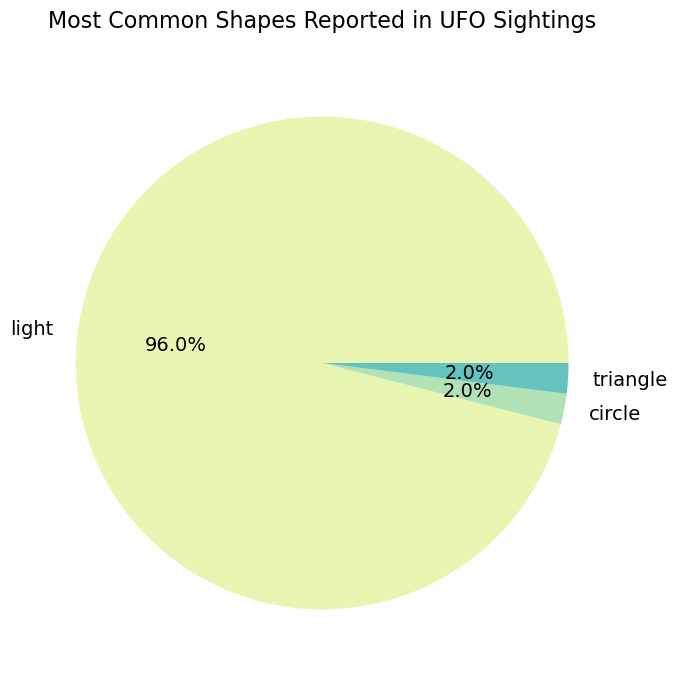

In [9]:
# Create a pie chart of the most common shapes seen in each state and save the visual
values = pd.DataFrame(shape_stats["max"].value_counts()).reset_index()

plt.figure(figsize=(8,8))
plt.pie(values["max"], labels=values["index"], autopct="%.1f%%", textprops={"fontsize": 14}, colors=sns.color_palette("YlGnBu"))
plt.title(label="Most Common Shapes Reported in UFO Sightings", fontdict={"fontsize":16}, pad=20)
plt.savefig("visuals/most_common_shape.png")
plt.show()

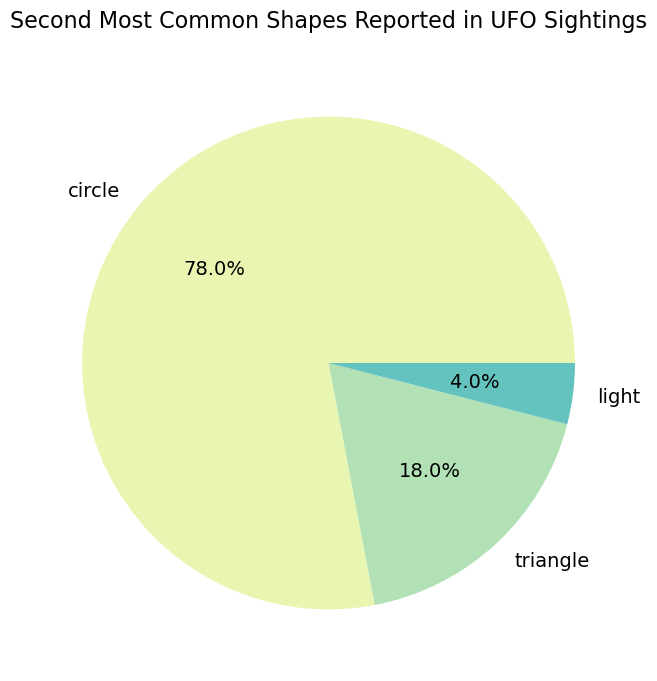

In [10]:
# Create a pie chart of the second most common shapes seen in each state and save the visual
values = pd.DataFrame(shape_stats["second"].value_counts()).reset_index()

plt.figure(figsize=(8,8))
plt.pie(values["second"], labels=values["index"], autopct="%.1f%%", textprops={"fontsize": 14}, colors=sns.color_palette("YlGnBu"))
plt.title(label="Second Most Common Shapes Reported in UFO Sightings", fontdict={"fontsize":16}, pad=20)
plt.savefig("visuals/second_common_shape.png")
plt.show()

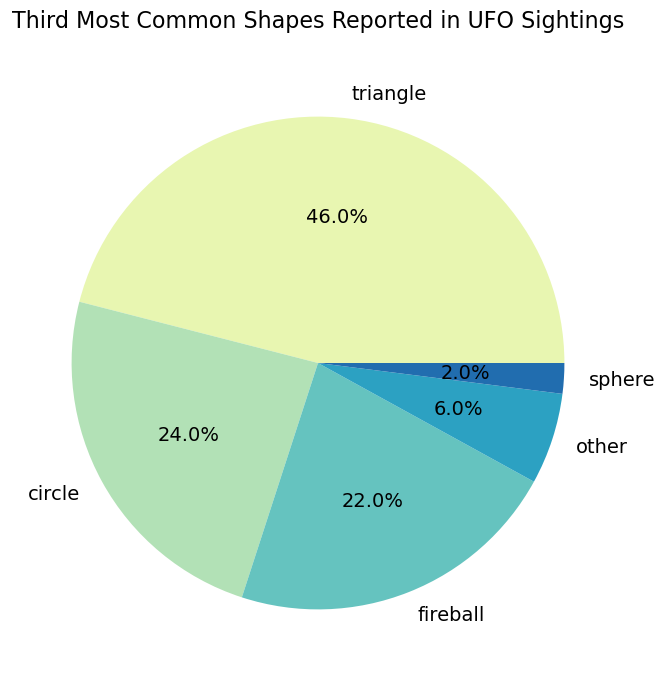

In [11]:
# Create a pie chart of the third most common shapes seen in each state and save the visual
values = pd.DataFrame(shape_stats["third"].value_counts()).reset_index()

plt.figure(figsize=(8,8))
plt.pie(values["third"], labels=values["index"], autopct="%.1f%%", textprops={"fontsize": 14}, colors=sns.color_palette("YlGnBu"))
plt.title(label="Third Most Common Shapes Reported in UFO Sightings", fontdict={"fontsize":16}, pad=20)
plt.savefig("visuals/third_common_shape.png")
plt.show()